By : Iván Alejandro García Amaya
 
The following work is based on the pytorch tutorial:

https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html

Where it explains how to implement Word2vec.

The tutorial is made by: Robert Guthrie [2]

In [16]:
%matplotlib inline

As Xin Rong mentions the word2vec model have attracted a large
amount of care in the last two years. The vector representations of words learned by word2vec models have been shown to have semantic meanings and are useful in
various NLP tasks. [1]

He mentions that there is a need for a material that explains in detail the process of learning the parameters of word insertion models and this creates a problem among researchers who are not experts in neural networks, making it difficult to understand the mechanism of such models. [1]


In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


torch.manual_seed(1)

The text used to train the model is observed in the following lines of code, the variable test_sentence contains a Shakespearean sonnet.

In [18]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
# print the first 3, just so you can see what they look like
print(trigrams[:3])

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}

#print(word_to_ix)
#print(vocab)


[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]


It is necessary to create the model, in this case the model is:


```

NGramLanguageModeler(
  
  (embeddings): Embedding(97, 10)

  (linear1): Linear(in_features=20, out_features=128, bias=True)
  
  (linear2): Linear(in_features=128, out_features=97, bias=True)
  
  (output) : Softmax(out_features)

)
```



In [19]:

class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs



For the loss function, NLLLoss () was implemented, which is given by the equation:

$ l(x,y) = 
  \begin{cases}
    \sum_{n=1}^N  \frac{1}{\sum_{n=1}^N w_{yn}} l_n    & \quad \text{if }  \text{ reduction = "mean";}\\
    \sum_{n=1}^N l_n & \quad \text{if }  \text{reduction = "sum".}
  \end{cases} $

$l_n​=−w_{yn}​x_{n,y_{n}}​​,$

Where $x$ is the input $y$ the target, $w$ the weigth $N$ the bach size.

The optimizer is the SGD implemented with a learning rate of 0.001



In [20]:
losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

The following code shows the training part of the model, for this case it was done with 200 epochs 

In [21]:


for epoch in range(200):
    total_loss = 0
    for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        #print(context_idxs)
        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    losses.append(total_loss)
    print("epoch: {:.4f} loss: {:.4f}".format(epoch, total_loss) )
#print(losses)  # The loss decreased every iteration over the training data!
#print(log_probs)

epoch: 0.0000 loss: 516.0957
epoch: 1.0000 loss: 513.4349
epoch: 2.0000 loss: 510.7922
epoch: 3.0000 loss: 508.1663
epoch: 4.0000 loss: 505.5560
epoch: 5.0000 loss: 502.9590
epoch: 6.0000 loss: 500.3748
epoch: 7.0000 loss: 497.8039
epoch: 8.0000 loss: 495.2439
epoch: 9.0000 loss: 492.6925
epoch: 10.0000 loss: 490.1492
epoch: 11.0000 loss: 487.6129
epoch: 12.0000 loss: 485.0840
epoch: 13.0000 loss: 482.5613
epoch: 14.0000 loss: 480.0432
epoch: 15.0000 loss: 477.5299
epoch: 16.0000 loss: 475.0205
epoch: 17.0000 loss: 472.5144
epoch: 18.0000 loss: 470.0109
epoch: 19.0000 loss: 467.5111
epoch: 20.0000 loss: 465.0145
epoch: 21.0000 loss: 462.5181
epoch: 22.0000 loss: 460.0218
epoch: 23.0000 loss: 457.5247
epoch: 24.0000 loss: 455.0257
epoch: 25.0000 loss: 452.5263
epoch: 26.0000 loss: 450.0269
epoch: 27.0000 loss: 447.5255
epoch: 28.0000 loss: 445.0231
epoch: 29.0000 loss: 442.5187
epoch: 30.0000 loss: 440.0131
epoch: 31.0000 loss: 437.5036
epoch: 32.0000 loss: 434.9894
epoch: 33.0000 loss:

The figure shows the decrease in loss with respect to the seasons

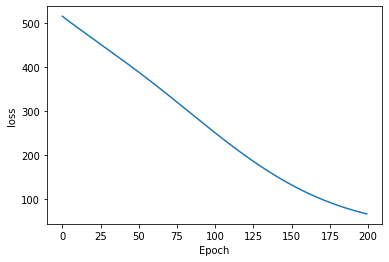

In [22]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

References.

[1]Rong, Xin. (2014). word2vec Parameter Learning Explained. 

[2]Robert Guthrie. (2017). Word Embeddings: Encoding Lexical Semantics. 2020, de Pytorch Sitio web: https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html